# Two-Sample Hypothesis Testing by Simulation
(c) 2018 by Jordan Ryda  
__[Framework](http://allendowney.blogspot.co.uk/2016/06/there-is-still-only-one-test.html)__ inspired by Allen Downey

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

In [2]:
def test_stat(group_a, group_b):
    return(np.mean(group_a) - np.mean(group_b))

In [3]:
def sample_from_groups(group_a, group_b, replace=True):
    merged_group = np.append(group_a, group_b)
    
    sampled_merged_group = np.random.choice(merged_group, len(merged_group), replace = replace)
    sim_group_a = sampled_merged_group[:len(group_a)]
    sim_group_b = sampled_merged_group[len(group_a):]
    
    return(sim_group_a, sim_group_b)

In [4]:
def run_hyp_test(group_a, group_b, num_sims, replace=True, alpha=.01):

    delta_dist_h0 = []
    delta_star = test_stat(group_a, group_b)

    # Run Simulations
    for i in range(num_sims):
        delta_sim = test_stat(*sample_from_groups(group_a, group_b, replace))
        delta_dist_h0.append(delta_sim)

    # Produce plot of delta distribution with observed delta as dashed line
    sns.distplot(delta_dist_h0, fit=sp.stats.norm, kde=False)
    plt.axvline(delta_star, color='b', linestyle='dashed', linewidth=2)

    # Tail-independence
    p_val = np.mean(delta_star <= delta_dist_h0) 
    p_val = p_val if p_val < .5 else np.mean(delta_star > delta_dist_h0)

    print("p-value", str(round(p_val*100, 3)) + '%')

    # Result of test
    if p_val < alpha:
        print("Reject H0: Data are from different distributions")
    else:
        print("Accept H0: Data are from the same distribution")

## Generate and Plot Groups to Test

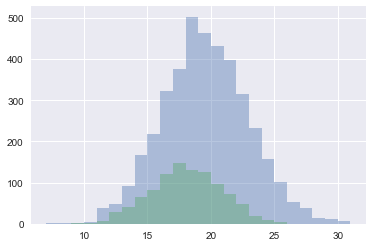

In [7]:
x1 = np.random.binomial(49, .39, 4000)
x2 = np.random.binomial(33, .53, 1000)

fig, ax = plt.subplots()
sns.distplot(x1, bins=np.arange(x1.min(), x1.max() + 1), ax=ax, kde=False)
sns.distplot(x2, bins=np.arange(x2.min(), x2.max() + 1), ax=ax, kde=False)

## Run Hypothesis Test

p-value 0.0%
Reject H0: Data are from different distributions


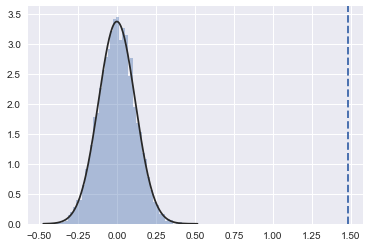

In [8]:
# Configurables
num_sims = 5000
replace = True  # False is permutation, True is sampling with replacement
alpha = .01 # Significance level - we care only about order of magnitude really

run_hyp_test(x1, x2, num_sims, replace, alpha)